In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sonnia.processing import Processing
from tqdm.notebook import tqdm


2023-06-05 10:12:34.994468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('peptide-detail-ci_filtered_aligned_merged.csv')
df["Amino Acids 1"] = df["Amino Acids"].apply(lambda x: x.split(",")[0])
df

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 27, 13]",CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ01-02,ADAGFIKQY
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF,"[12, 16, 34, 34, 31, 31, 31, 31, 23, 27, 27, 13]",CASSLVATGNTGELFF+TCRBV07-09+TCRBJ02-02,CGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCT...,eOX56,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV07-09,TCRBJ02-02,ADAGFIKQY
2,CALKVGADTQYF,CALKV--------GADTQYF,"[12, 16, 31, 31, 31, 31, 31, 31, 31, 31, 27, 13]",CALKVGADTQYF+TCRBV30-01+TCRBJ02-03,CTGAGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCT...,eQD124,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV30-01,TCRBJ02-03,ADAGFIKQY
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF,"[12, 16, 34, 34, 31, 31, 34, 27, 27, 13]",CASSLWASGRGGTGELFF+TCRBV27-01+TCRBJ02-02,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-02,ADAGFIKQY
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF,"[12, 16, 34, 34, 31, 31, 31, 31, 27, 27, 13]",CASSLLGWEQLDEQFF+TCRBV27-01+TCRBJ02-01,TCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTT...,eMR16,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-01,ADAGFIKQY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236340,CASSSGPQETQYF,CASSS-------GPQETQYF,"[12, 16, 34, 34, 34, 31, 31, 31, 31, 31, 31, 3...",CASSSGPQETQYF+TCRBV07-09+TCRBJ02-05,GAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTG...,eAV88,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236341,CASSKRDSQETQYF,CASSK------RDSQETQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSKRDSQETQYF+TCRBV07-09+TCRBJ02-05,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eDH105,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL
236342,CASSQLPGQGKVQYF,CASSQ-----LPGQGKVQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 45, 27, 13]",CASSQLPGQGKVQYF+TCRBV04-01+TCRBJ02-07,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eAV93,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV04-01,TCRBJ02-07,AQVDVVNFNL
236343,CASSPGDNEQFF,CASSP--------GDNEQFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGDNEQFF+TCRBV09-01+TCRBJ02-01,CTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCT...,eEE224,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV09-01,TCRBJ02-01,AQVDVVNFNL


In [3]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

aa = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q","R", "S", "T", "V", "W", "Y", "-"]

# integer encode
label_encoder = LabelEncoder()
y_encoder =LabelEncoder()
y_encoder = y_encoder.fit(df['Amino Acids'].unique())
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = label_encoder.fit_transform(aa)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit(integer_encoded)

one_hot_status = True
col_one_hot = []
col_integer = []
y_labels = []
for k in tqdm(df.index):
    integer_encoded = label_encoder.transform(list(df.loc[k,"CDR3_al"]))
    col_integer.append(integer_encoded)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    if one_hot_status:
        onehot_encoded = onehot_encoder.transform(integer_encoded)
        col_one_hot.append(onehot_encoded)
    y_label = y_encoder.transform([df.loc[k,"Amino Acids"]])
    y_labels.append(y_label)
    
y_labels = [int(y) for y in y_labels]
if one_hot_status:
    df["CDR3_al_one_hot"] = col_one_hot
df["CDR3_al_integer"] = col_integer
df["label"] = y_labels

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


  0%|          | 0/236345 [00:00<?, ?it/s]

In [4]:
v_labels = []
v_encoder = LabelEncoder()
v_encoder_one_hot = OneHotEncoder(sparse=False)
v_encoder = v_encoder.fit(df['v_gene'].unique())
v_encoder_one_hot = v_encoder_one_hot.fit(v_encoder.transform(df['v_gene'].unique()).reshape(-1,1))
for k in tqdm(df.index):
    v_label = v_encoder.transform([df.loc[k,"v_gene"]])
    v_label = v_encoder_one_hot.transform(v_label.reshape(-1,1))
    v_labels.append(v_label)
df["v_gene_one_hot"] = v_labels

j_labels = []
j_encoder = LabelEncoder()
j_encoder_one_hot = OneHotEncoder(sparse=False)
j_encoder = j_encoder.fit(df['j_gene'].unique())
j_encoder_one_hot = j_encoder_one_hot.fit(j_encoder.transform(df['j_gene'].unique()).reshape(-1,1))
for k in tqdm(df.index):
    j_label = j_encoder.transform([df.loc[k,"j_gene"]])
    j_label = j_encoder_one_hot.transform(j_label.reshape(-1,1))
    j_labels.append(j_label)
df["j_gene_one_hot"] = j_labels

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


  0%|          | 0/236345 [00:00<?, ?it/s]

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


  0%|          | 0/236345 [00:00<?, ?it/s]

In [33]:
df_save = df.drop_duplicates(subset=['CDR3_al'])
df_save = df_save.sample(n=1000, random_state=42)
df_save.to_csv('./models/cdr3_seqs.csv', index=False)

In [6]:
import pickle
with open("./encoders/integer_encoder.pkl", "wb") as f: 
    pickle.dump(label_encoder, f)

with open("./encoders/v_gene_encoder.pkl", "wb") as f: 
    pickle.dump(v_encoder, f)

with open("./encoders/j_gene_encoder.pkl", "wb") as f: 
    pickle.dump(j_encoder, f)

with open("./encoders/v_gene_one_hot_encoder.pkl", "wb") as f: 
    pickle.dump(v_encoder_one_hot, f) 

with open("./encoders/j_gene_one_hot_encoder.pkl", "wb") as f:
    pickle.dump(j_encoder_one_hot, f)

In [5]:
print(len(df['j_gene'].unique()))
print(len(df['v_gene'].unique()))
df["v_gene_one_hot"][0].shape

13
54


(1, 54)

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Concatenate


In [6]:
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.75,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 10,
            "patience": 20
        }

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
data = df[['CDR3_al_integer', 'v_gene_one_hot', 'j_gene_one_hot']]
data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))
data = [np.stack(col.values) for _, col in data.items()]
#X_train = tf.constant(df["CDR3"].to_numpy())
#X_train_v_gene = tf.constant(df["v_gene"].to_numpy())
#X_train_j_gene = tf.constant(df["j_gene"].to_numpy())
X_train = data

/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_42279/66160319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_42279/66160319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))


In [17]:
n_inputs = 20
v_inputs = 54
j_inputs = 13
# define encoder
cdr3_input = Input(shape=(n_inputs,), name='cdr3_input')
v_gene_input = Input(shape=(v_inputs,), name='v_gene_input')
j_gene_input = Input(shape=(j_inputs,), name='j_gene_input')
cdr3_embedding = Dense(n_inputs*2)(cdr3_input)
cdr3_embedding = BatchNormalization()(cdr3_embedding)
cdr3_embedding = ReLU()(cdr3_embedding)

v_gene_embedding = Dense(params['v_gene_embedding_dim'], name='v_gene_embedding')(v_gene_input)
j_gene_embedding = Dense(params['j_gene_embedding_dim'], name='j_gene_embedding')(j_gene_input)
merged_embedding = Concatenate(axis=1,name='merged_embedding')([cdr3_embedding, v_gene_embedding, j_gene_embedding])

encoder_dense_1 = Dense(params['dense_nodes'], activation='elu', name='encoder_dense_1')(merged_embedding)
encoder_dense_2 = Dense(params['dense_nodes'], activation='elu', name='encoder_dense_2')(encoder_dense_1)

# Latent layers:
bottleneck = Dense(params['latent_dim'], name='bottleneck')(encoder_dense_2)

# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model([cdr3_input, v_gene_input, j_gene_input], [output])
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
3693/3693 [==============================] - 6s 2ms/step - loss: 5.8379
Epoch 2/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.7084
Epoch 3/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.5533
Epoch 4/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.4704
Epoch 5/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.4293
Epoch 6/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.3988
Epoch 7/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.3780
Epoch 8/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.3621
Epoch 9/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.3475
Epoch 10/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.3340
Epoch 11/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.3261
Epoch 12/20
3693/3693 [==============================] - 5s 1ms/step - loss: 0.3119
E

In [18]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 40)          160         ['dense_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                         

In [19]:
import pickle as pkl
loss_simple_ae = pkl.load(open("./loss_ae_simple.pkl", "rb"))

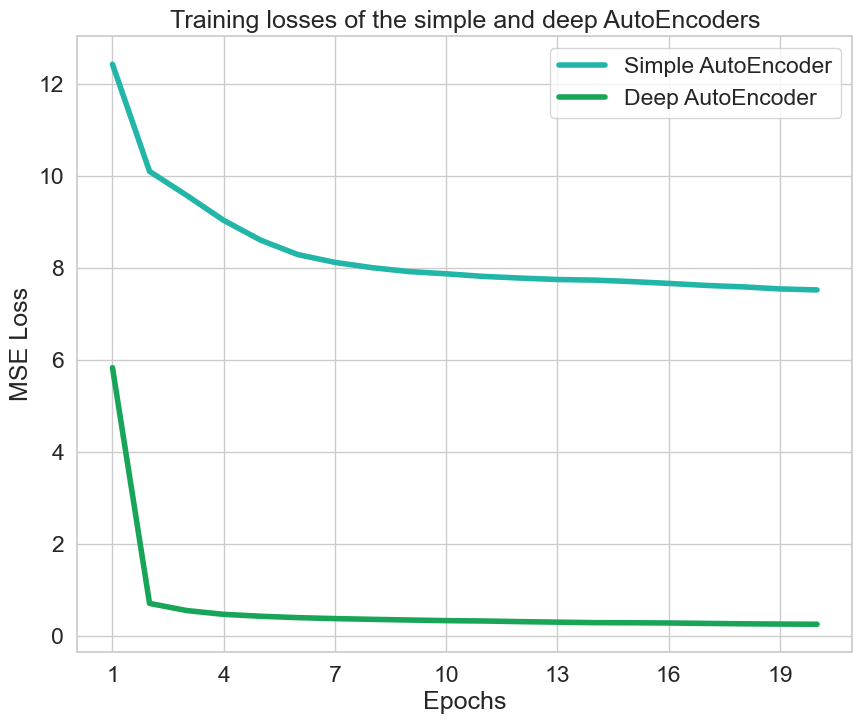

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1.5, style="whitegrid")
plt.plot(range(1,21),loss_simple_ae, label='Simple AutoEncoder', color='#21B6A8', lw=4)
plt.plot(range(1,21),history.history['loss'], label='Deep AutoEncoder', color='#18A558', lw=4)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.xticks(range(1,21,3))
plt.legend()
plt.title("Training losses of the simple and deep AutoEncoders")
plt.savefig("./images/simplevsdeep.png", dpi=300, bbox_inches='tight')
plt.show()

In [22]:
encoder = Model(inputs=[cdr3_input, v_gene_input, j_gene_input], outputs=bottleneck)

In [23]:
# save model 
model.save('./models/deep_ae.h5')
# save the encoder to file
encoder.save('./models/deep_ae_encoder.h5')

In [21]:
import seaborn as sns
from sklearn.decomposition import PCA
rgb_values = sns.color_palette("Spectral", df["label"].nunique())
df["label_color"] = df["label"].apply(lambda x: rgb_values[x])
N = 300
X_test = X_train.copy()
for i in range(len(X_test)):
    X_test[i] = X_test[i][:N]

X_test_encode = encoder.predict(X_test)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test_encode)

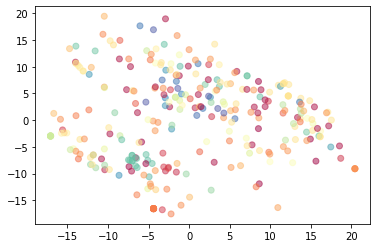

In [22]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['label_color'][:N], alpha=0.5)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

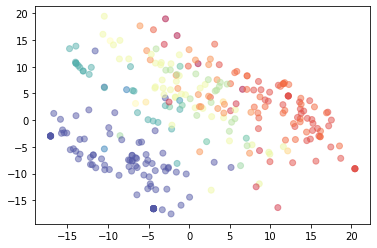

In [26]:
df["end_seq_label"] = df["CDR3_al"].apply(lambda x: x[15:])
end_labels = []
end_encoder = LabelEncoder()
end_encoder = end_encoder.fit(df['end_seq_label'].unique())
for k in tqdm(df.index):
    end_label = end_encoder.transform([df.loc[k,"end_seq_label"]])
    end_labels.append(end_label)
end_labels = [int(y) for y in end_labels]
df["end_seq_label"] = end_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["end_seq_label"].nunique())
df["end_seq_color"] = df["end_seq_label"].apply(lambda x: rgb_values[x])

plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['end_seq_color'][:N], alpha=0.5)
plt.show()

<ipython-input-29-4e310ce451fa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['end_seq_kmeans_label'] = kmeans.labels_


Accuracy:  0.5666666666666667


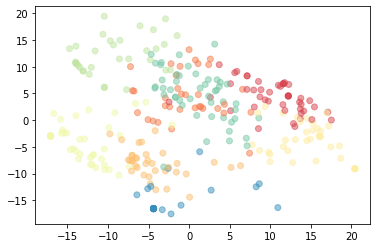

In [29]:
from sklearn.cluster import KMeans
k = 8
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['end_seq_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['end_seq_kmeans_label'] == cluster]['end_seq_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['end_seq_kmeans_label'], sample['end_seq_label'])])/len(sample))
plt.scatter(principalComponents[:,0], principalComponents[:,1], color=col_kmeans, alpha=0.5)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

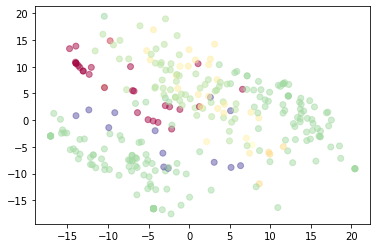

In [23]:
df["end_seq_label"] = df["CDR3_al"].apply(lambda x: x[17:])
end_labels = []
end_encoder = LabelEncoder()
end_encoder = end_encoder.fit(df['end_seq_label'].unique())
for k in tqdm(df.index):
    end_label = end_encoder.transform([df.loc[k,"end_seq_label"]])
    end_labels.append(end_label)
end_labels = [int(y) for y in end_labels]
df["end_seq_label"] = end_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["end_seq_label"].nunique())
df["end_seq_color"] = df["end_seq_label"].apply(lambda x: rgb_values[x])

plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['end_seq_color'][:N], alpha=0.5)
plt.show()

Accuracy:  0.5666666666666667


<ipython-input-31-a33e27ccaa2a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['end_seq_kmeans_label'] = kmeans.labels_


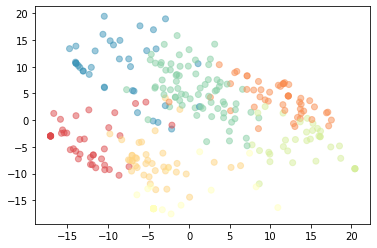

In [31]:
from sklearn.cluster import KMeans
k = 7
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['end_seq_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['end_seq_kmeans_label'] == cluster]['end_seq_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['end_seq_kmeans_label'], sample['end_seq_label'])])/len(sample))
plt.scatter(principalComponents[:,0], principalComponents[:,1], color=col_kmeans, alpha=0.5)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

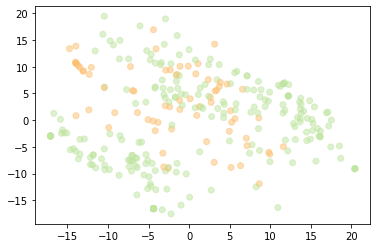

In [32]:
df["j_label"] = df["j_gene"].apply(lambda x: x.split("-")[0])
j_labels = []
j_encoder = LabelEncoder()
j_encoder = j_encoder.fit(df['j_label'].unique())
for k in tqdm(df.index):
    j_label = j_encoder.transform([df.loc[k,"j_label"]])
    j_labels.append(j_label)
j_labels = [int(y) for y in j_labels]
df["j_label"] = j_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["j_label"].nunique())
df["j_color"] = df["j_label"].apply(lambda x: rgb_values[x])

plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['j_color'][:N], alpha=0.5)
plt.show()

Accuracy:  0.7666666666666667


<ipython-input-35-2005d038991c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['j_kmeans_label'] = kmeans.labels_


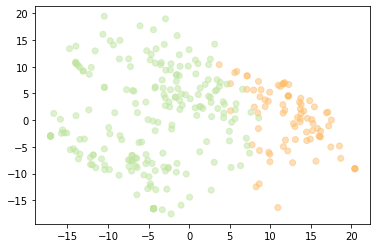

In [35]:
from sklearn.cluster import KMeans
k = 2 # 8 is highest accuracy
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode[:N])
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
sample = df[:N]
sample['j_kmeans_label'] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label = sample[sample['j_kmeans_label'] == cluster]['j_label'].value_counts().index[0]
    label_dict[cluster] = label

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(sample['j_kmeans_label'], sample['j_label'])])/len(sample))
plt.scatter(principalComponents[:,0], principalComponents[:,1], color=col_kmeans, alpha=0.5)
plt.show()

  0%|          | 0/236345 [00:00<?, ?it/s]

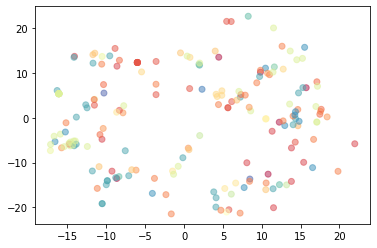

In [65]:
df["v_label"] = df["v_gene"].apply(lambda x: x.split("-")[0])
v_labels = []
v_encoder = LabelEncoder()
v_encoder = v_encoder.fit(df['v_label'].unique())
for k in tqdm(df.index):
    v_label = v_encoder.transform([df.loc[k,"v_label"]])
    v_labels.append(v_label)
v_labels = [int(y) for y in v_labels]
df["v_label"] = v_labels
import seaborn as sns
rgb_values = sns.color_palette("Spectral", df["v_label"].nunique())
df["v_color"] = df["v_label"].apply(lambda x: rgb_values[x])

plt.scatter(principalComponents[:,0], principalComponents[:,1], color=df['v_color'][:N], alpha=0.5)
plt.show()